# Reading S band radar (en)

In [1]:
import pyart
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
from mpl_toolkits.basemap import Basemap


from pyart.io.sband_archive import read_sband_archive


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



First, you need to set several parameters of `read_sband_archive` function:
lat, lon and elevation (m)

In [2]:
filename = "Z_RADR_I_Z9230_20190427210500_O_DOR_SA_CAP.bin"
radar = read_sband_archive(filename, station=(29.5219, 106.4889, 438.8))

/home/xin/Software/miniconda3/envs/pyart/lib/python3.6/site-packages/pyart/io/sband_archive.py:183: UserWarning: Gate spacing is not constant, interpolating data in scans [0, 2, 4, 5, 6, 7, 8, 9, 10] for moment REF.
  UserWarning)


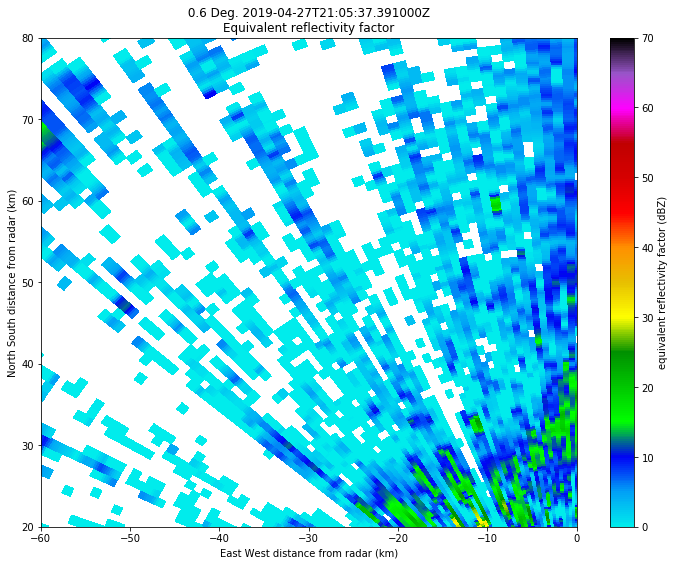

In [3]:
fig, ax = plt.subplots(figsize=(12, 9))

display = pyart.graph.radardisplay.RadarDisplay(radar)
display.plot_ppi("reflectivity", 0, vmin=0, vmax=70)

ax.set_xlim([-60, 0])
ax.set_ylim([20, 80])

plt.show()

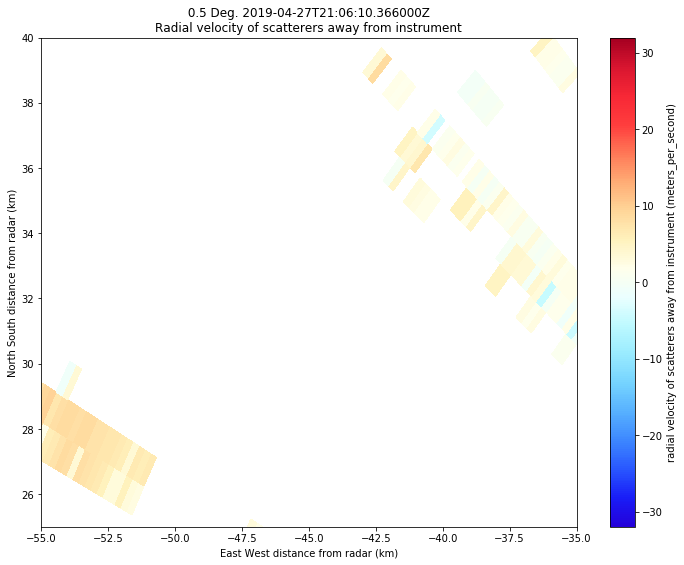

In [4]:
fig, ax = plt.subplots(figsize=(12, 9))

display = pyart.graph.radardisplay.RadarDisplay(radar)
display.plot_ppi("velocity", 1, vmin=-32, vmax=32)
ax.set_xlim([-55, -35])
ax.set_ylim([25, 40])

plt.show()

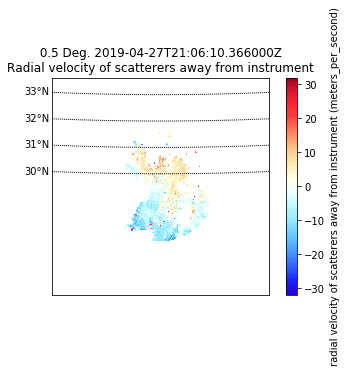

In [5]:
# add map

fig, ax = plt.subplots()

display = pyart.graph.radarmapdisplay.RadarMapDisplay(radar)
display.plot_ppi_map("velocity", 1, vmin=-32, vmax=32)

plt.show()

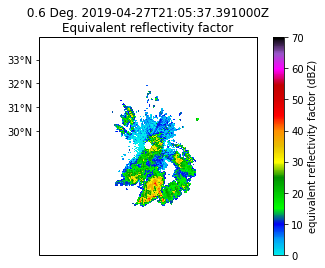

In [6]:
# use cartopy

fig, ax = plt.subplots()

display = pyart.graph.radarmapdisplay_cartopy.RadarMapDisplayCartopy(radar)
display.plot_ppi_map("reflectivity", 0, vmin=0, vmax=70)

plt.show()

You can also plot data and calculate other variables without functions in pyart.

In [7]:
# check keys
for i in radar.gate_latitude.keys():
    print(i)

long_name
units
data


In [8]:
# get lon, lat and the reflectivity at the lowest level
sweep = 0
lat = radar.gate_latitude.get('data')[radar.get_start(sweep):radar.get_end(sweep)+1, :]
lon = radar.gate_longitude.get('data')[radar.get_start(sweep):radar.get_end(sweep)+1, :]
height = radar.gate_altitude.get('data')[radar.get_start(sweep):radar.get_end(sweep)+1, :]

In [9]:
ref = radar.get_field(0, 'reflectivity').data[:, :]

/home/xin/Software/miniconda3/envs/pyart/lib/python3.6/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


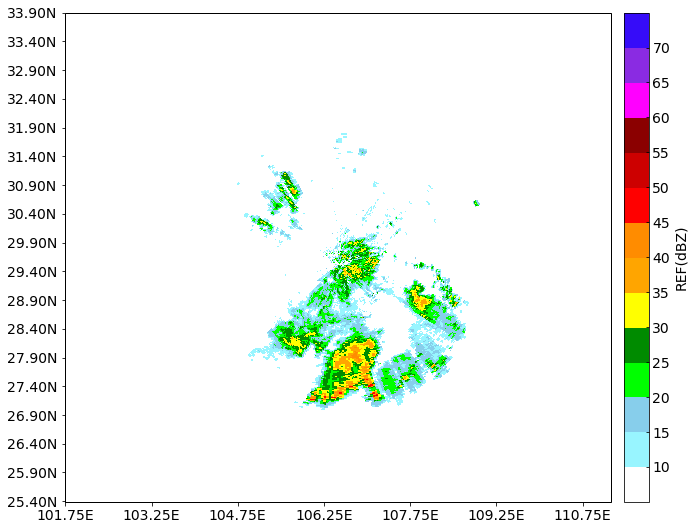

In [10]:
from matplotlib import colors

proj = ccrs.PlateCarree()

ft = 14

## set the colormap
colev = ["#FFFFFF", "#98F5FF", "#87CEEB", "#00FF00", "#008B00", "#FFFF00", "#FFA500", 
         "#FF8C00", "#FF0000", "#CD0000", "#8B0000", "#FF00FF", "#8A2BE2", "#360CF9"]

cmaps = colors.ListedColormap(colev, "indexed")  

## axes
xmin = np.min(lon)
xmax = np.max(lon)
ymin = np.min(lat)
ymax = np.max(lat)
xstep = 1.5
ystep = 0.5


ref[ref <= -32] = np.nan
#velocity[velocity <= -64] = np.nan

fig, ax = plt.subplots(figsize=(12, 9),
                       subplot_kw=dict(projection=proj)
                      )

pc=ax.pcolor(lon, lat, ref, cmap=cmaps, vmin=5, vmax=75)

ax.set_xlim([xmin - 0.01, xmax + 0.01])
ax.set_ylim([ymin - 0.01, ymax + 0.01])

ax.set_xticks(np.arange(xmin, xmax + 0.01, xstep))
ax.set_yticks(np.arange(ymin, ymax + ystep/2, ystep))

ax.set_xticklabels(np.arange(xmin, xmax + 0.01, xstep), fontdict=dict(fontsize=ft))
ax.set_yticklabels(np.arange(ymin, ymax + ystep/2, ystep), fontdict=dict(fontsize=ft))

lon_formatter = LongitudeFormatter(number_format='.2f',
                               degree_symbol='',
                               dateline_direction_label=True)

lat_formatter = LatitudeFormatter(number_format='.2f',
                                   degree_symbol='')

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)


cb = fig.colorbar(pc, pad=0.02)
cb.set_ticks(np.arange(10, 71, 5))
cb.ax.tick_params(direction="in")
cb.ax.set_yticklabels(np.arange(10, 71, 5), fontdict=dict(fontsize=ft))
cb.ax.set_ylabel("REF(dBZ)", fontdict=dict(fontsize=ft))

fig.tight_layout()

plt.show()